# **Performance Metrics for Classification Problems**

In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [59]:
## Missing Values
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [60]:
## Remove missing values (not recommended - imputing is preferred)
df.dropna(inplace = True)

In [61]:
## X Matrix and y vector
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [62]:
## y variable
y.value_counts() / len(y)

0    0.847648
1    0.152352
Name: TenYearCHD, dtype: float64

In [63]:
## If I flip a coin and determine if someone would get CHD by the flip of the coin
## I am expected to get 85% accuracy

In [64]:
## Split the data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 591)

In [65]:
y_train.value_counts() / len(y_train)

0    0.846815
1    0.153185
Name: TenYearCHD, dtype: float64

In [66]:
y_test.value_counts() / len(y_test)

0    0.84959
1    0.15041
Name: TenYearCHD, dtype: float64

## **Logistic Regression**

* sklearn: predictive models (no p-values)
* statsmodel.api: descriptive models (p-value, statistics,...)

In [67]:
import statsmodels.api as sm

## instance and fit
lr = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.383254
         Iterations 7


In [68]:
## p-values
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                          Logit   Df Residuals:                     2543
Method:                           MLE   Df Model:                           15
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.1050
Time:                        21:16:01   Log-Likelihood:                -980.75
converged:                       True   LL-Null:                       -1095.7
Covariance Type:            nonrobust   LLR p-value:                 1.597e-40
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.2405      0.850     -8.514      0.000      -8.907      -5.574
male                0.5005      0.129      3.885      0.000       0.248       0.753
age                 0.0584      

In [69]:
## Propensities (risk)
phat_model1 = lr.predict(sm.add_constant(X_test))

In [70]:
## prediction at 50% cutoff
yhat_model1 = (phat_model1 > 0.5).astype('int')

## **Random Forest**

* sklearn: predictive

In [71]:
from sklearn.ensemble import RandomForestClassifier

## instance
rf = RandomForestClassifier(random_state = 591)

## fit
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=591)

In [72]:
## Predictions
yhat_model2 = rf.predict(X_test)

In [73]:
## Propensities
phat_model2 = rf.predict_proba(X_test)[:,1]

## **Confusion Matrix**

Table of predictions versus actual

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [75]:
## we need a prediction y_hat, y_pred = {0, 1}
confusion_matrix(y_test, yhat_model1)

array([[930,   2],
       [151,  14]])

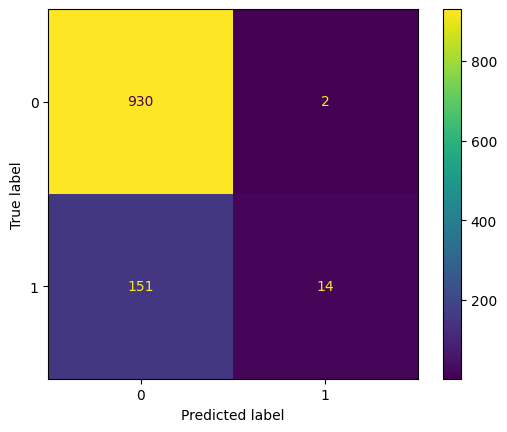

In [76]:
## even better
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1)).plot()

In [77]:
## Accuracy
(930 + 14) / len(y_test)

0.8605287146763901

In [78]:
## accuracy_score in sklearn
from sklearn.metrics import accuracy_score

accuracy_score(y_test, yhat_model1)

0.8605287146763901

In [79]:
## Model 1 does not do too different than the benchmark (0.84959 acc)

In [80]:
y_test.value_counts() / len(y_test)

0    0.84959
1    0.15041
Name: TenYearCHD, dtype: float64

Random Forest

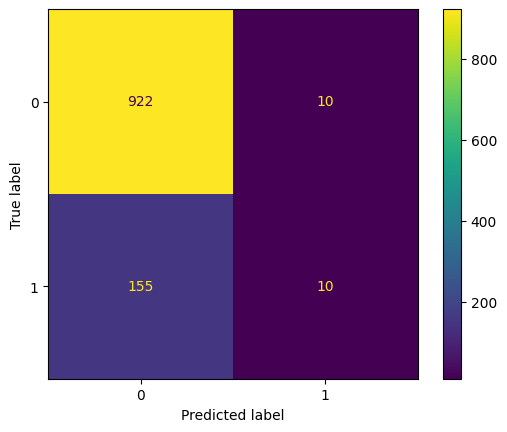

In [81]:
## Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model2)).plot()

In [82]:
accuracy_score(y_test, yhat_model2)

0.8495897903372835

In [83]:
## Misclassification Rate
print(f'The error for the LR is: {1 - accuracy_score(y_test, yhat_model1)}')
print(f'The error for the RF is: {1 - accuracy_score(y_test, yhat_model2)}')

The error for the LR is: 0.13947128532360986
The error for the RF is: 0.15041020966271645


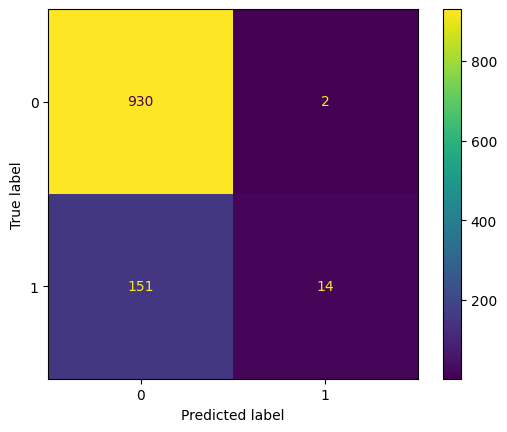

In [84]:
## even better
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1)).plot()

In [85]:
# recall, true positive rate, detection rate
## the higher the better
Sensitivity = 14 / (151+14)
Sensitivity

0.08484848484848485

In [86]:
## recall_score in sklearn
from sklearn.metrics import recall_score

recall_score(y_test, yhat_model1)

0.08484848484848485

In [87]:
## Sensitivity, Recall
print(f'The detection rate for the LR is: {recall_score(y_test, yhat_model1)}')
print(f'The detection rate for the RF is: {recall_score(y_test, yhat_model2)}')

The detection rate for the LR is: 0.08484848484848485
The detection rate for the RF is: 0.06060606060606061


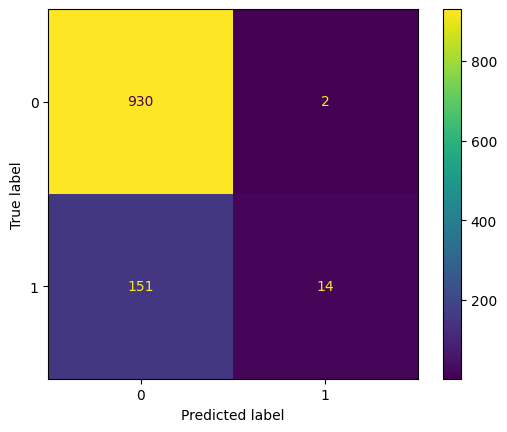

In [88]:
## even better
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1)).plot()

In [89]:
Specificity = 930 / (930+2)
Specificity

0.9978540772532188

In [90]:
## You can get the specificity and the sensitivity in a matrix
confusion_matrix(y_test, yhat_model1, normalize = "true")

array([[0.99785408, 0.00214592],
       [0.91515152, 0.08484848]])

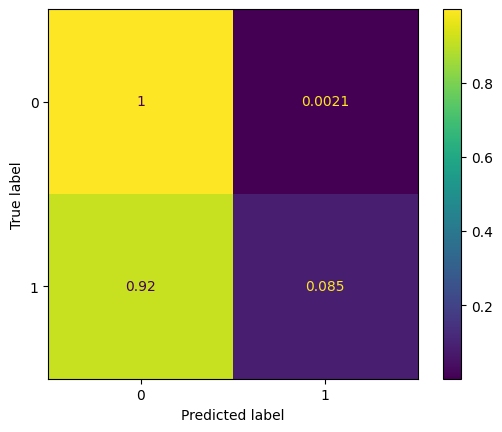

In [91]:
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1, normalize = "true")).plot()

**What if we used a different threshold other than 50%?**

accuracy: 0.8495897903372835
detection rate (sensitivity): 0.0


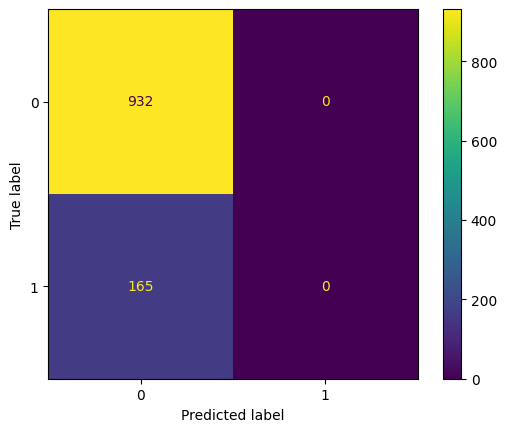

In [92]:
## let's change the threshold and check the performance
yhat_model1 = (phat_model1 > .99).astype('int')
print(f'accuracy: {accuracy_score(y_test, yhat_model1)}')
print(f'detection rate (sensitivity): {recall_score(y_test, yhat_model1)}')

ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1)).plot();

## **What is the Optimal Threshold?**

There is NOT a plan that works ALL the time. We can use a threshold that maximizes sensitivity and minimizes (1-specificity or false positive rate). The ROC Curve allows you to get all possible thresholds, along with tpr (recall, sensitivity) and fpr (false positive rates, 1-specificity).

In [93]:
## get all thresholds
from sklearn.metrics import roc_curve

In [94]:
fpr, tpr, thresh = roc_curve(y_test, phat_model1)

In [95]:
cutoffs = pd.DataFrame({'threshold': thresh, 'true positive rate': tpr, 'false positive rate': fpr})

In [96]:
cutoffs

,threshold,true positive rate,false positive rate
0,1.735896,0.000000,0.000000
1,0.735896,0.006061,0.000000
2,0.623474,0.024242,0.000000
3,0.615153,0.024242,0.001073
4,0.555005,0.048485,0.001073
...,...,...,...
245,0.040730,0.987879,0.901288
246,0.040574,0.993939,0.901288
247,0.025254,0.993939,0.990343
248,0.025198,1.000000,0.990343


In [97]:
## Youden's J Statistic
## selects the optimal threshold
## this does not work all the time
## meant to optimize sensitivity (detection rate)

optimal_idx = np.argmax(tpr - fpr) ## this gives obs number
optimal_threshold = thresh[optimal_idx]  ## retrieves the threshold
print(optimal_threshold)

0.13616998233470606


accuracy: 0.6572470373746582
detection rate (sensitivity): 0.7757575757575758


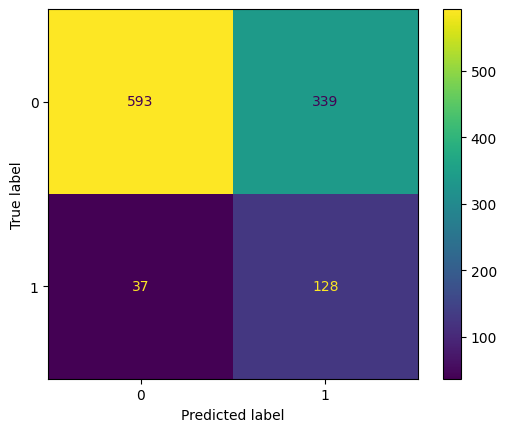

In [98]:
## let's change the threshold and check the performance
yhat_model1 = (phat_model1 > 0.13616998233470606).astype('int')
print(f'accuracy: {accuracy_score(y_test, yhat_model1)}')
print(f'detection rate (sensitivity): {recall_score(y_test, yhat_model1)}')

ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1)).plot();

## **Determine/Compare Best Models with the Propensities**

We can determine how good a model is with ONLY the propensities (not choosing threshold). If we have several models, we can compare them at once.

In [99]:
## ROC CURVE
## Plot of TPR and FPR
## import modules
from sklearn.metrics import auc, roc_curve

In [100]:
## Get TPR, FPR and Thresholds
fpr, tpr, thresh = roc_curve(y_test, phat_model1)

In [101]:
## Get AUC
## This is similar R2
## The higher the AUC, the more separation there is between CHD and non-CHD patients in the model
## If you get an AUC of 1, that means the model can perfectly separate (predict) CHD from Non-CHD
AUC_val = auc(fpr, tpr)
print("AUC:", AUC_val)

AUC: 0.7645402523084927


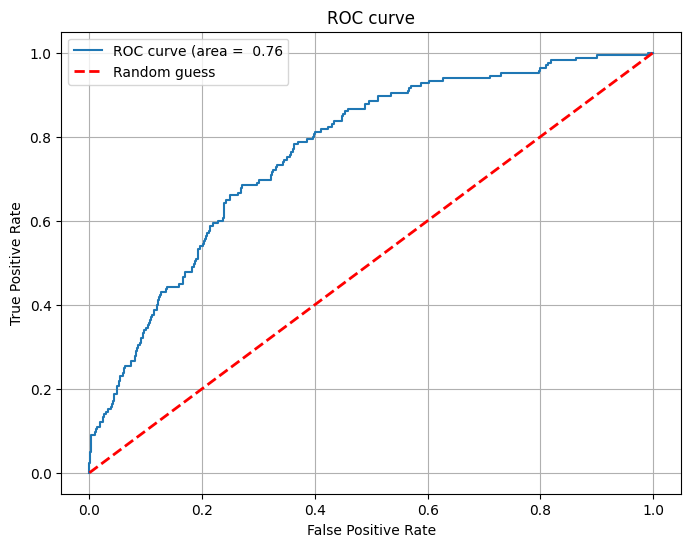

In [102]:
## Plot ROC Curve with AUC
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label= f'ROC curve (area = {AUC_val: 0.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [103]:
## For Model 2
## Get TPR, FPR and Thresholds
fpr, tpr, thresh = roc_curve(y_test, phat_model2)

In [104]:
## Get AUC
## This is similar R2
## The higher the AUC, the more separation there is between CHD and non-CHD patients in the model
## If you get an AUC of 1, that means the model can perfectly separate (predict) CHD from Non-CHD
AUC_val = auc(fpr, tpr)
print("AUC:", AUC_val)

AUC: 0.7194791260241904


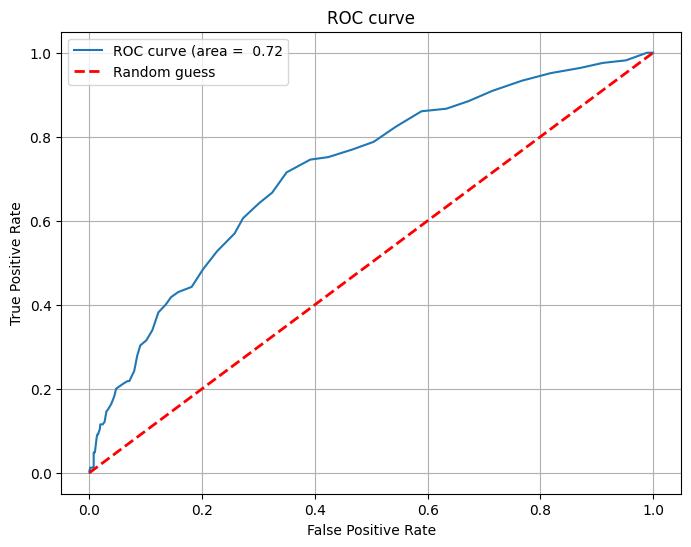

In [105]:
## Plot ROC Curve with AUC
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label= f'ROC curve (area = {AUC_val: 0.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [106]:
## Using Scikitplot module to get ROC Curve
!pip install Scikit-plot

In [107]:
import scikitplot as skplt

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

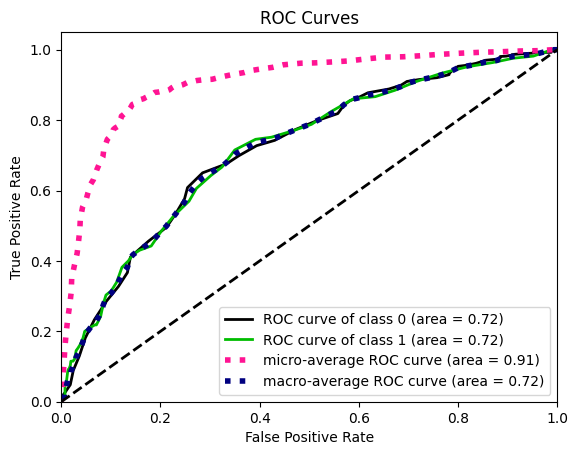

In [108]:
## RF ROC CURVE
skplt.metrics.plot_roc(y_test, rf.predict_proba(X_test))

In [110]:
np.vstack([1-phat_model1, phat_model1]).T

array([[0.81871248, 0.18128752],
       [0.87949906, 0.12050094],
       [0.91965093, 0.08034907],
       ...,
       [0.97744682, 0.02255318],
       [0.7255689 , 0.2744311 ],
       [0.46190229, 0.53809771]])

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

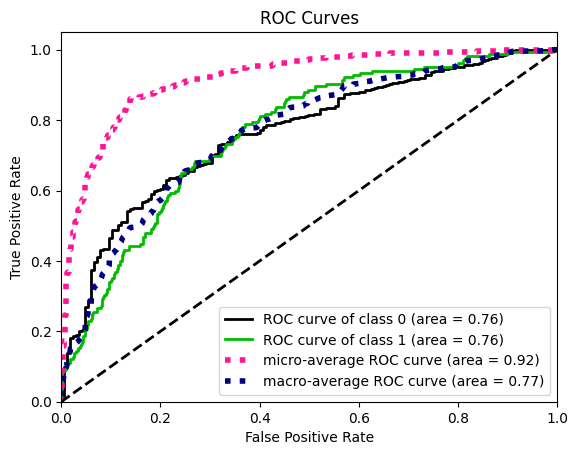

In [111]:
## Logistic Regression ROC CURVE
skplt.metrics.plot_roc(y_test, np.vstack([1-phat_model1, phat_model1]).T)

## **Lift Chart**

THis determines how much better than random the model is in a **given sample**. If I select the top 50 patients (highest probability of getting CHD), how much better than random is this model.

Lift is calculated as:

* Numerator: proportion of 1s in the sample (e.g., 50, 100, 1000)
* Denominator: proportion of 1s in the whole data.

In [112]:
df_test = X_test.copy()
df_test['CHD'] = y_test
df_test['phat_model1'] = phat_model1
df_test['phat_model2'] = phat_model2

In [113]:
df_test.to_csv('df_test_CHD.csv')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD,phat_model1,phat_model2
261,1,47,1.0,1,20.0,0.0,0,0,0,284.0,137.0,91.0,27.33,73.0,61.0,0,0.181288,0.26
3043,1,57,4.0,0,0.0,0.0,0,0,0,235.0,123.0,78.0,28.53,60.0,74.0,0,0.120501,0.15
1708,0,49,2.0,1,11.0,0.0,0,0,0,206.0,107.0,74.0,20.23,65.0,83.0,0,0.080349,0.15
1644,0,41,4.0,0,0.0,0.0,0,0,0,159.0,119.0,76.0,27.49,55.0,70.0,0,0.025930,0.01
1083,0,54,2.0,0,0.0,0.0,0,0,0,279.0,127.0,70.0,23.48,92.0,79.0,0,0.092362,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1,58,1.0,1,1.0,0.0,0,0,0,240.0,148.0,81.0,25.67,90.0,78.0,0,0.266476,0.21
1789,0,46,2.0,0,0.0,0.0,0,1,0,264.0,150.0,99.0,26.67,80.0,102.0,0,0.107545,0.03
4015,0,38,3.0,0,0.0,0.0,0,0,0,159.0,108.0,72.0,27.68,70.0,84.0,0,0.022553,0.00
768,1,56,1.0,1,1.0,0.0,0,0,0,280.0,147.0,94.0,28.30,63.0,85.0,0,0.274431,0.32


<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

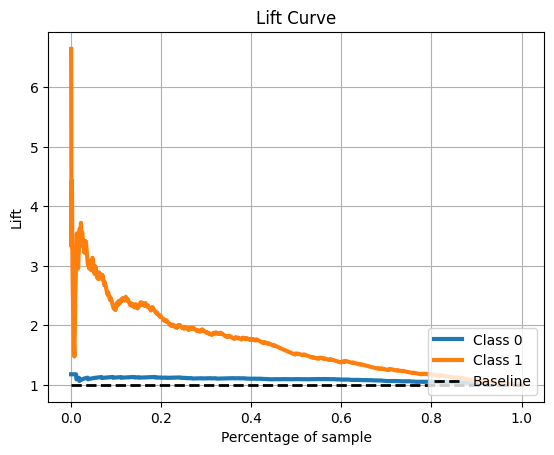

In [114]:
## lift for the RF
skplt.metrics.plot_lift_curve(y_test, rf.predict_proba(X_test))

In [116]:
skplt.metrics.plot_lift_curve(y_test,rf.predict_proba(X_test))

array([[0.74, 0.26],
       [0.85, 0.15],
       [0.85, 0.15],
       ...,
       [1.  , 0.  ],
       [0.68, 0.32],
       [0.5 , 0.5 ]])

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

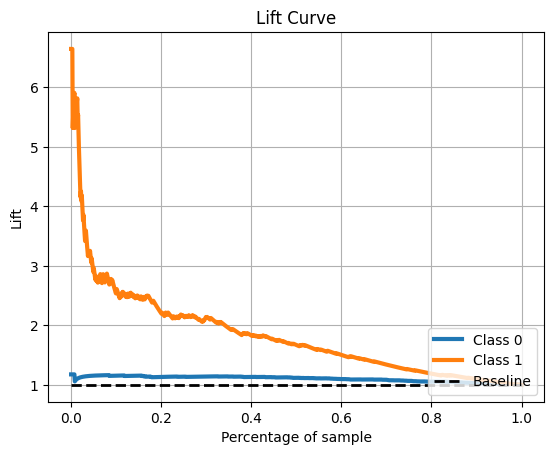

In [115]:
## Logistic Regression Lift Curve
skplt.metrics.plot_lift_curve(y_test, np.vstack([1-phat_model1, phat_model1]).T)